Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_36 (SimpleRNN)            │ (None, 10)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247 (988.00 B)

 Trainable params: 247 (988.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_37 (SimpleRNN)            │ (None, 1, 10)               │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_38 (SimpleRNN)            │ (None, 1, 10)               │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_39 (SimpleRNN)            │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 667 (2.61 KB)

 Trainable params: 667 (2.61 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


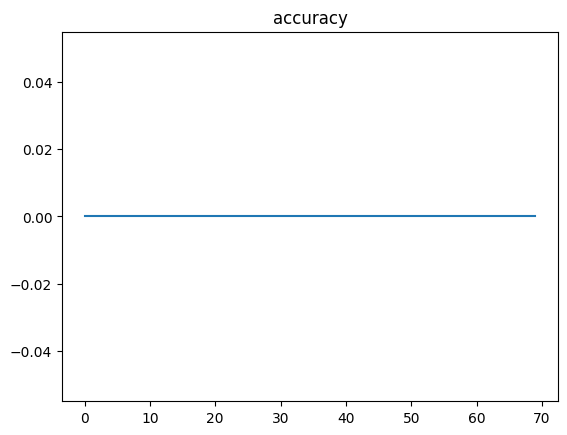

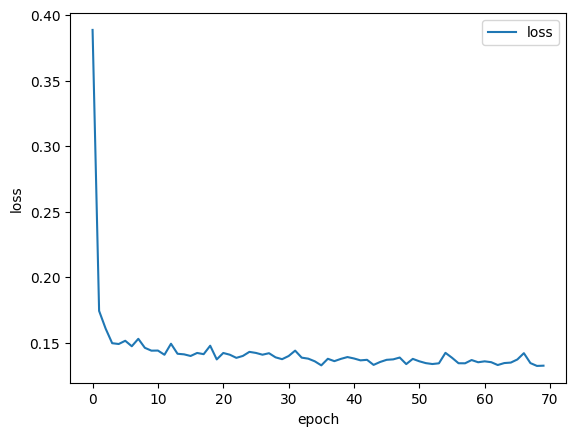

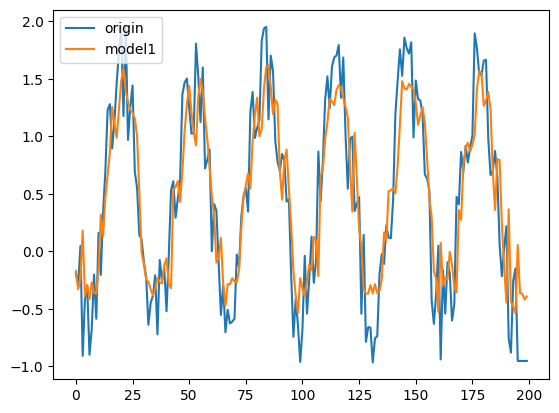

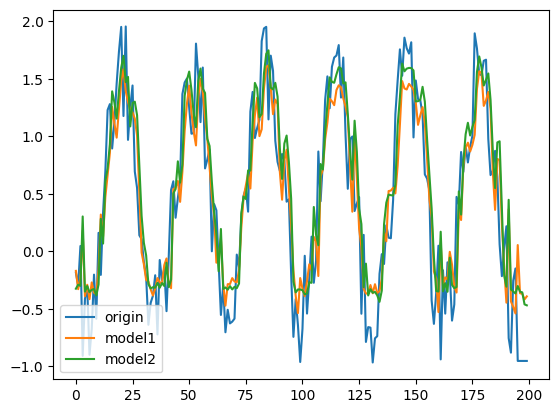

In [20]:
from logging import addLevelName
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


t = np.arange(0, 1000)
x = np.sin(0.2 * t) + np.random.rand(len(t))   #사인값 저장  난수 줘서 사인그래프 구불하게 만들기 + np.random.rand(len(t))
train, test = x[0:800], x[800:1000] #앞 800개는 학습데이터 , 뒤 200개는 예측을 위한 데이터

#개념만 알고있으면 됨
#      x(feature)                 y(lable)
# sin(1) sin(3) sin(3) sin(4)  ->  sin(5)
# sin(2) sin(3) sin(4) sin(5)  ->  sin(6)
# sin(3) sin(4) sin(5) sin(6)  ->  sin(7)
def convert_to_matrix(data, step):
  x, y = [], []
  for i in range(len(data) - step):
    d = i + step
    x.append(data[i:d])
    y.append(data[d])
  return np.array(x), np.array(y)

train = np.append(train, np.repeat(train[-1], 4))
test = np.append(test, np.repeat(test[-1], 4))

train_x, train_y = convert_to_matrix(train, 4)
test_x, test_y = convert_to_matrix(test, 4)

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))




### model 1 ###
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(units=10, input_shape=(1,4), return_sequences=False, activation='relu')) #units : RNN노드의 개수 / input_shape: 1차원 4개의 값 넣겠다.
#return_sequences=False <- 아웃풋데이터 맨마지막값말고 1~t-1까지의 아웃풋데이터를 안쓰겠다. / 디폴트값도 False임
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1)) #softmax안써도됨 값나온거 자체가 예측값임 / wx+b연산만 시켜주는 레이어임
model.summary()

#model1의 fit 함수 만들기 loss 함수 mse(민스퀘어) 써야됨
adam = keras.optimizers.Adam(learning_rate=0.01) # Stochastic GD
model.compile(optimizer=adam, loss='mse', metrics=['accuracy']) #mse : 값의 차이의 크기
hist = model.fit(train_x, train_y, epochs=70, batch_size=16, verbose=0)
### model 1 ###



### model 2 ###
model2 = keras.Sequential()
model2.add(keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape = (1,4), activation='relu'))
model2.add(keras.layers.SimpleRNN(units=10, return_sequences=True, activation='relu'))
model2.add(keras.layers.SimpleRNN(units=10, return_sequences=False, activation='relu'))
model2.add(keras.layers.Dense(8, activation='relu'))
model2.add(keras.layers.Dense(1))
model2.summary()

#model2의 fit 함수 만들기 loss 함수 mse(민스퀘어) 써야됨
adam = keras.optimizers.Adam(learning_rate=0.01) # Stochastic GD
model2.compile(optimizer=adam, loss='mse', metrics=['accuracy'])
hist2 = model2.fit(train_x, train_y, epochs=70, batch_size=16, verbose=0)
### model 2 ###



test_predictions = model.predict(test_x) #model1 예측된값이 저장될거임

test_predictions2 = model2.predict(test_x) #model2 예측된값이 저장될거임


#정확도
plt.plot(hist.history['accuracy'])
plt.title('accuracy')
plt.show()

#첫번째 그래프 loss값 떨어지는거 보이기
plt.plot(hist.history['loss'], label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

#두번째그래프 정답 sin그래프와 예측한 sin그래프 비교
plt.plot(test_y, label="origin") #정답 4개
plt.plot(test_predictions, label="model1")  #5번째 이후의 값 - 예측된값
plt.legend()
plt.show()

#세번째그래프 정답, model1(RNN 레이어1개), model2(RNN 레이어 3개)
plt.plot(test_y, label="origin") #정답
plt.plot(test_predictions, label="model1") #model1 예측
plt.plot(test_predictions2, label="model2") #model2 예측
plt.legend()
plt.show()

#origin - 정답
#model1 - 예측값1
#model2 - 예측값2


#problem1 - 하나는 교수님이 주는 모델
# tanh쓰고 rnn 4개 dropout4개 쓸거임 relu는 마이너스는 다 0으로만들어서 배니슁 그레덴트 나올수있음
#dropout 0.2로 80%만 사용하는걸로, 40개넣고 41번째를 예측하는거임
#epochs 많이하기 / 적게하면 예측이 잘 안됨 - 교수님 결과와 유사한 그래프 나오게 해야함
#옵티마이저 ADAM 쓰기

#problem2 - 두번째는 우리가 직접 모델 자유롭게 꾸려서 만드는거
#모델 만들어서 model1의 성능과 비교하기  - 어떠한 근거로 모델을 이렇게 설계했는지 정확하게 보고서에 설명해줘야함.
# 그냥 랜덤으로골랐다 - 0점